<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(0_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.599131,43.087330,57.860031,0.992718,196.539209,195.087697,1.451513
1,0.0,1.0,82.437922,70.301235,44.318431,-0.171520,206.886068,206.860260,0.025808
2,0.0,2.0,72.699120,68.445818,93.649088,-2.535046,242.258980,244.288998,-2.030018
3,0.0,3.0,98.159318,73.413113,77.790441,-1.753423,257.609449,258.523427,-0.913978
4,0.0,4.0,33.626723,95.526100,50.127059,2.236332,191.516214,190.075926,1.440287
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,92.005982,97.195580,57.977133,0.918019,258.096713,257.003016,1.093697
29996,999.0,26.0,75.597837,50.062937,97.958533,4.287521,237.906828,234.477723,3.429105
29997,999.0,27.0,74.489171,42.562878,79.084196,-3.532230,202.604015,206.621451,-4.017436
29998,999.0,28.0,74.323956,89.366292,22.451567,0.484452,196.626267,195.033865,1.592402


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.599131  43.087330  57.860031  0.992718  196.539209   
      1.0    82.437922  70.301235  44.318431 -0.171520  206.886068   
      2.0    72.699120  68.445818  93.649088 -2.535046  242.258980   
      3.0    98.159318  73.413113  77.790441 -1.753423  257.609449   
      4.0    33.626723  95.526100  50.127059  2.236332  191.516214   
...                ...        ...        ...       ...         ...   
999.0 25.0   92.005982  97.195580  57.977133  0.918019  258.096713   
      26.0   75.597837  50.062937  97.958533  4.287521  237.906828   
      27.0   74.489171  42.562878  79.084196 -3.532230  202.604015   
      28.0   74.323956  89.366292  22.451567  0.484452  196.626267   
      29.0   34.276291  72.357621  83.274481  0.560360  200.468753   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    195.087697  1.451513  
      1.0    206.860260  0.025808  
      2.0    244.288998 -2.030018  
      3.0    258.523427 -0.913978  
      4.0    190.075926  1.440287  
...                 ...       ...  
999.0 25.0   257.003016  1.093697  
      26.0   234.477723  3.429105  
      27.0   206.621451 -4.017436  
      28.0   195.033865  1.592402  
      29.0   199.793204  0.675548  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.599131  43.087330  57.860031  0.992718  196.539209   
      1.0    82.437922  70.301235  44.318431 -0.171520  206.886068   
      2.0    72.699120  68.445818  93.649088 -2.535046  242.258980   
      3.0    98.159318  73.413113  77.790441 -1.753423  257.609449   
      4.0    33.626723  95.526100  50.127059  2.236332  191.516214   
...                ...        ...        ...       ...         ...   
999.0 25.0   92.005982  97.195580  57.977133  0.918019  258.096713   
      26.0   75.597837  50.062937  97.958533  4.287521  237.906828   
      27.0   74.489171  42.562878  79.084196 -3.532230  202.604015   
      28.0   74.323956  89.366292  22.451567  0.484452  196.626267   
      29.0   34.276291  72.357621  83.274481  0.560360  200.468753   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    195.087697  1.451513  
      1.0    206.860260  0.025808  
      2.0    244.288998 -2.030018  
      3.0    258.523427 -0.913978  
      4.0    190.075926  1.440287  
...                 ...       ...  
999.0 25.0   257.003016  1.093697  
      26.0   234.477723  3.429105  
      27.0   206.621451 -4.017436  
      28.0   195.033865  1.592402  
      29.0   199.793204  0.675548  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,84.599131,43.087330,57.860031,0.992718,196.539209,195.087697,1.451513
1,0.0,1.0,82.437922,70.301235,44.318431,-0.171520,206.886068,206.860260,0.025808
2,0.0,2.0,72.699120,68.445818,93.649088,-2.535046,242.258980,244.288998,-2.030018
3,0.0,3.0,98.159318,73.413113,77.790441,-1.753423,257.609449,258.523427,-0.913978
4,0.0,4.0,33.626723,95.526100,50.127059,2.236332,191.516214,190.075926,1.440287
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,92.005982,97.195580,57.977133,0.918019,258.096713,257.003016,1.093697
29996,999.0,26.0,75.597837,50.062937,97.958533,4.287521,237.906828,234.477723,3.429105
29997,999.0,27.0,74.489171,42.562878,79.084196,-3.532230,202.604015,206.621451,-4.017436
29998,999.0,28.0,74.323956,89.366292,22.451567,0.484452,196.626267,195.033865,1.592402


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    84.599131  43.087330  57.860031  0.992718  196.539209   
      1.0    82.437922  70.301235  44.318431 -0.171520  206.886068   
      2.0    72.699120  68.445818  93.649088 -2.535046  242.258980   
      3.0    98.159318  73.413113  77.790441 -1.753423  257.609449   
      4.0    33.626723  95.526100  50.127059  2.236332  191.516214   
...                ...        ...        ...       ...         ...   
999.0 25.0   92.005982  97.195580  57.977133  0.918019  258.096713   
      26.0   75.597837  50.062937  97.958533  4.287521  237.906828   
      27.0   74.489171  42.562878  79.084196 -3.532230  202.604015   
      28.0   74.323956  89.366292  22.451567  0.484452  196.626267   
      29.0   34.276291  72.357621  83.274481  0.560360  200.468753   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    195.087697  1.451513  
      1.0    206.860260  0.025808  
      2.0    244.288998 -2.030018  
      3.0    258.523427 -0.913978  
      4.0    190.075926  1.440287  
...                 ...       ...  
999.0 25.0   257.003016  1.093697  
      26.0   234.477723  3.429105  
      27.0   206.621451 -4.017436  
      28.0   195.033865  1.592402  
      29.0   199.793204  0.675548  

[30000 rows x 7 columns]

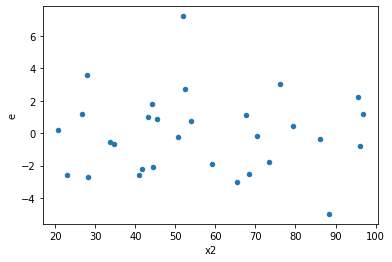

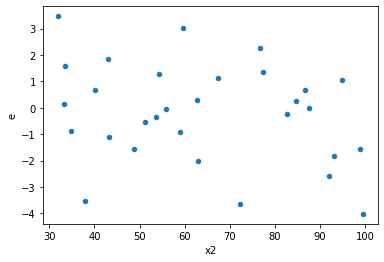

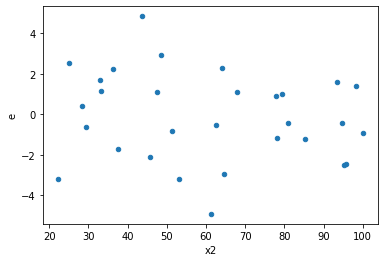

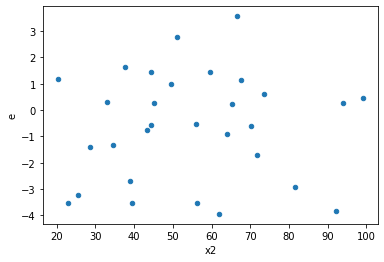

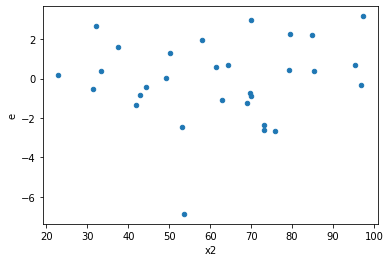

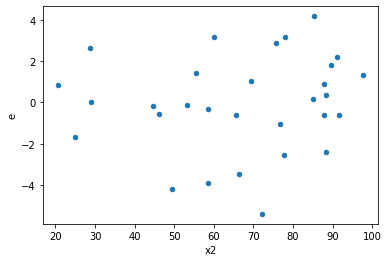

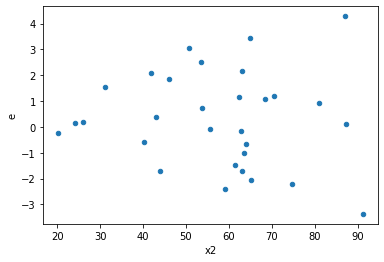

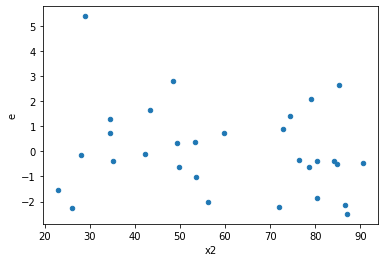

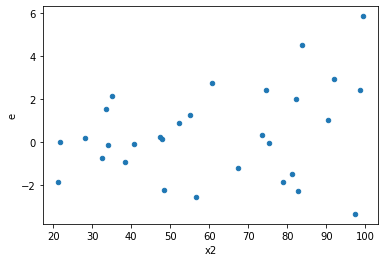

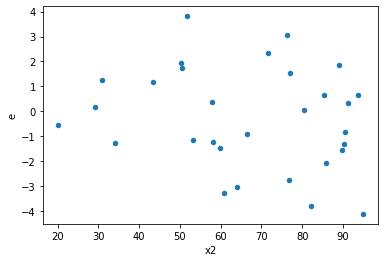

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,14.0,10.0,46.61189253112359,81.49199328278323,3.3294208950802564,8.149199328278323,2.447632661980361,0.15935743580142603,0.920321282099287,0.07967871790071301,Reject001=1 : Homoscedasticity
4.0,8.0,16.0,18.372588880211648,84.03650388738554,2.296573610026456,5.252281492961596,2.2870076839823525,0.1513835914962156,0.9243082042518922,0.0756917957481078,Reject001=1 : Homoscedasticity
7.0,11.0,13.0,20.452682362261612,50.89864111542978,1.8593347602056012,3.915280085802291,2.1057424244407437,0.20272680278973,0.898636598605135,0.101363401394865,Reject001=1 : Homoscedasticity
9.0,16.0,8.0,36.280984624935876,34.69546951604444,2.2675615390584922,4.336933689505555,1.9125980110362433,0.3550830478919249,0.8224584760540375,0.17754152394596245,Reject001=1 : Homoscedasticity
11.0,11.0,13.0,29.063511171820316,71.97288198887867,2.6421373792563925,5.536375537606052,2.0954154697149843,0.20565026680334153,0.8971748665983292,0.10282513340167077,Reject001=1 : Homoscedasticity
13.0,9.0,15.0,16.33487904958149,54.58728296910932,1.81498656106461,3.639152197940621,2.0050573794915687,0.22454882488571504,0.8877255875571425,0.11227441244285752,Reject001=1 : Homoscedasticity
17.0,6.0,18.0,6.707600291438599,99.58698762574484,1.1179333819064332,5.532610423652491,4.948962534974691,0.0074709383106037475,0.9962645308446981,0.0037354691553018737,Reject001=0 : Heteroscedasticity
18.0,13.0,11.0,80.50905743478766,109.47671426158387,6.19300441806059,9.952428569234897,1.607043673376163,0.43720690117889904,0.7813965494105505,0.21860345058944952,Reject001=1 : Homoscedasticity
21.0,18.0,6.0,75.38774350206704,39.56659937183788,4.188207972337057,6.594433228639647,1.5745238231233047,0.5983851222029468,0.7008074388985266,0.2991925611014734,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,14.0,10.0,46.61189253112359,81.49199328278323,3.3294208950802564,8.149199328278323,2.447632661980361,0.15935743580142603,Reject001=1 : Homoscedasticity
1.0,15.0,9.0,57.42767338779164,27.130771553127907,3.8285115591861096,3.0145301725697675,0.7873895967054665,0.6555148363860419,Reject001=1 : Homoscedasticity
2.0,10.0,14.0,39.42218053240048,37.93045472422764,3.9422180532400484,2.7093181945876883,0.6872573150439868,0.5577412816762464,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,51.305572110329415,33.600838958196185,3.664683722166387,3.3600838958196184,0.9168823698197062,0.8584610010852592,Reject001=1 : Homoscedasticity
4.0,8.0,16.0,18.372588880211648,84.03650388738554,2.296573610026456,5.252281492961596,2.2870076839823525,0.1513835914962156,Reject001=1 : Homoscedasticity
5.0,12.0,12.0,70.27859047486592,54.856960882679054,5.856549206238827,4.5714134068899215,0.7805643299334215,0.6746796816220425,Reject001=1 : Homoscedasticity
6.0,12.0,12.0,41.365732211791105,39.23978373865328,3.447144350982592,3.269981978221107,0.9486060475793577,0.9286854971826872,Reject001=1 : Homoscedasticity
7.0,11.0,13.0,20.452682362261612,50.89864111542978,1.8593347602056012,3.915280085802291,2.1057424244407437,0.20272680278973,Reject001=1 : Homoscedasticity
8.0,13.0,11.0,72.18774423875125,31.24069389000552,5.552903402980865,2.8400630809095926,0.5114555170156594,0.25022959877845957,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      971
Reject001=0 : Heteroscedasticity     29
Name: Result_test, dtype: int64